In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
import os
import string
print(os.getcwd())
import matplotlib.pyplot as plt
import dateutil.parser as parser
import re

C:\Users\win-10


In [2]:
nw=pd.read_csv('drugsComTest_raw.csv')
train= pd.read_csv('drugsComTrain_raw.csv')

In [3]:
nw


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


In [4]:
nw.isna().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [5]:
nw=nw.dropna()

In [6]:
nw.isna().sum()


uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [7]:
type(nw)

pandas.core.frame.DataFrame

In [8]:
nw.head

<bound method NDFrame.head of        uniqueID                       drugName                     condition  \
0        163740                    Mirtazapine                    Depression   
1        206473                     Mesalamine  Crohn's Disease, Maintenance   
2        159672                        Bactrim       Urinary Tract Infection   
3         39293                       Contrave                   Weight Loss   
4         97768                Cyclafem 1 / 35                 Birth Control   
5        208087                        Zyclara                     Keratosis   
6        215892                         Copper                 Birth Control   
7        169852                  Amitriptyline           Migraine Prevention   
8         23295                      Methadone             Opiate Withdrawal   
9         71428                         Levora                 Birth Control   
10       196802                     Paroxetine                   Hot Flashes   
11        

In [9]:
all_list = set(nw.index)
span_list = []
for i,j in enumerate(nw['condition']):
    if '</span>' in j:
        span_list.append(i)

In [10]:
span_list

[135,
 208,
 345,
 365,
 569,
 716,
 775,
 1047,
 1148,
 1208,
 1285,
 1526,
 1999,
 2121,
 2318,
 2640,
 2771,
 2836,
 4057,
 4082,
 4343,
 4761,
 5114,
 5120,
 5971,
 6045,
 6357,
 6370,
 6535,
 6644,
 6657,
 7151,
 7290,
 7530,
 7557,
 7603,
 7660,
 7781,
 7800,
 8159,
 8213,
 8355,
 8380,
 8456,
 8895,
 9258,
 9327,
 9330,
 9334,
 9395,
 9441,
 9722,
 9795,
 10290,
 10502,
 10582,
 10605,
 10844,
 11146,
 11670,
 11725,
 11741,
 11877,
 11942,
 11992,
 12044,
 12073,
 12235,
 12416,
 12481,
 12640,
 12652,
 12794,
 13189,
 13223,
 13566,
 13665,
 13897,
 14097,
 14308,
 14632,
 14701,
 14862,
 15002,
 15127,
 15368,
 15542,
 15914,
 16019,
 16375,
 16410,
 16536,
 16748,
 16980,
 17856,
 17977,
 18084,
 18141,
 18153,
 18191,
 18192,
 19460,
 19872,
 20006,
 20144,
 20172,
 20313,
 20602,
 20723,
 20875,
 20971,
 21020,
 21389,
 21460,
 21634,
 21656,
 21680,
 21770,
 21776,
 22018,
 22243,
 22675,
 22692,
 22706,
 23050,
 23561,
 23652,
 23970,
 24081,
 24289,
 24298,
 24437,
 246

In [11]:
train.isna().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [12]:
train=train.dropna()

In [13]:
train.isna().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

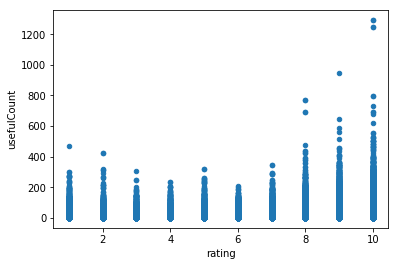

In [14]:
train.plot.scatter(x='rating',y='usefulCount')

In [15]:
train.nlargest(15,'usefulCount')

,uniqueID,drugName,condition,review,rating,date,usefulCount
6716,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
33552,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
4249,182560,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
21708,131116,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
146145,119151,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,5-Aug-08,949
16889,52305,Adipex-P,Weight Loss,"""I have used this pill off and on for the past...",10,19-Oct-08,796
58608,139141,Phentermine,Weight Loss,"""I have used this pill off and on for the past...",10,19-Oct-08,796
2039,62757,Citalopram,Depression,"""I responded after one week. The side effects ...",8,25-Mar-08,771
152838,89825,Celexa,Depression,"""I responded after one week. The side effects ...",8,25-Mar-08,771
5218,107655,Implanon,Birth Control,"""I was very nervous about trying Implanon afte...",10,19-Jul-10,730


In [16]:
train['drugName'].value_counts()

Levonorgestrel                                3631
Etonogestrel                                  3321
Ethinyl estradiol / norethindrone             2750
Nexplanon                                     2156
Ethinyl estradiol / norgestimate              2033
Ethinyl estradiol / levonorgestrel            1809
Phentermine                                   1538
Sertraline                                    1353
Escitalopram                                  1287
Mirena                                        1242
Implanon                                      1102
Gabapentin                                    1042
Bupropion                                     1017
Venlafaxine                                   1012
Miconazole                                     998
Citalopram                                     994
Medroxyprogesterone                            971
Lexapro                                        952
Bupropion / naltrexone                         945
Duloxetine                     

In [17]:
commonCDF=train['condition'].value_counts().nlargest(15)
commonCDF

Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Name: condition, dtype: int64

In [18]:
birthControlDF=train[['condition','rating','drugName']]
birthControlDF=birthControlDF.loc[birthControlDF['condition']=='Birth Control']

In [19]:
birthControlDF['drugName'].value_counts().nlargest(15)

Etonogestrel                          3314
Ethinyl estradiol / norethindrone     2337
Nexplanon                             2149
Levonorgestrel                        2129
Ethinyl estradiol / levonorgestrel    1600
Ethinyl estradiol / norgestimate      1580
Implanon                              1095
Mirena                                 965
Skyla                                  822
Lo Loestrin Fe                         667
Ethinyl estradiol / etonogestrel       631
NuvaRing                               620
Copper                                 607
Drospirenone / ethinyl estradiol       522
Medroxyprogesterone                    502
Name: drugName, dtype: int64

In [20]:
EtonogestrelDF=birthControlDF.loc[birthControlDF['drugName']=='Etonogestrel']
EtonogestrelDF['rating'].mean()

5.808992154496077

In [21]:
train['year']=[parser.parse(date).date().year for date in train['date']]
nw['year']=[parser.parse(date).date().year for date in nw['date']]

C:\Users\win-10\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
ConditionsDict = {}
ConditionsDictYearly = {}
conditions = list(commonCDF.index)[:5]
for condition in conditions:
    cdf = train[['condition','rating','drugName','year']].loc[train['condition'] == condition]
    cdf.reset_index(drop=True)
    drugs = list(cdf['drugName'].value_counts().nlargest(5).index)
    ConditionsDict[condition] = [cdf.loc[cdf['drugName'] == drug].reset_index(drop=True) for drug in drugs]
    ConditionsDictYearly[condition] = [cdf.loc[cdf['drugName'] == drug].groupby(['year']).mean().reset_index() for drug in drugs]
    

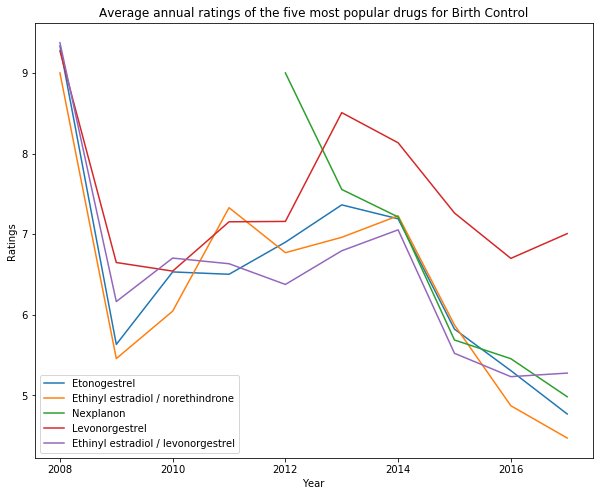

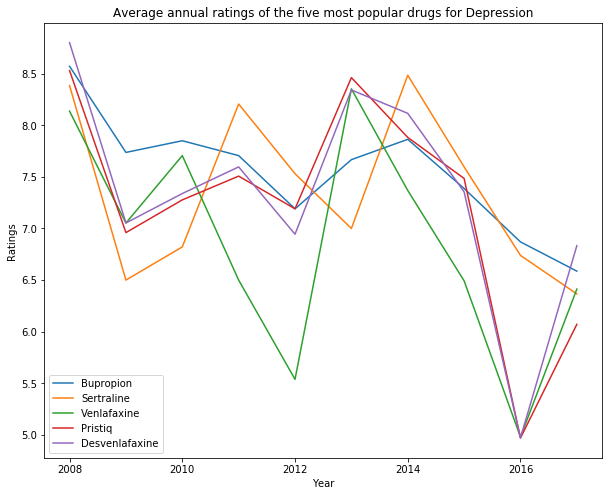

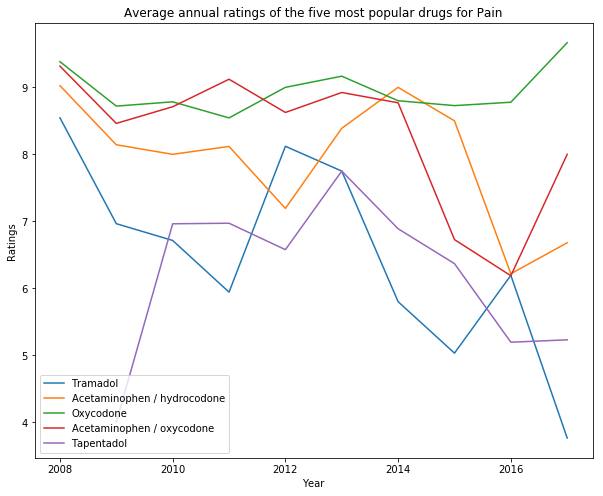

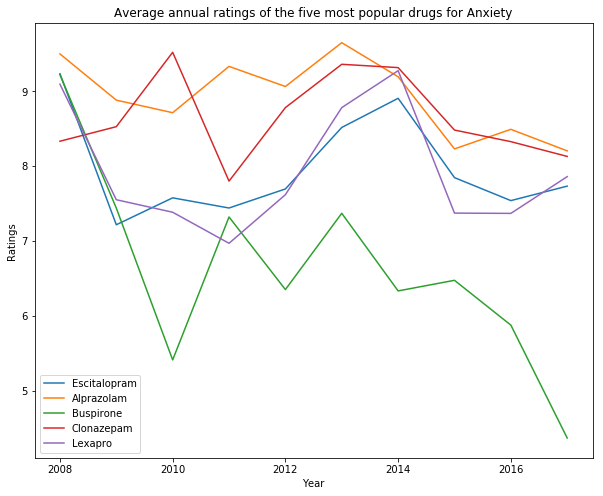

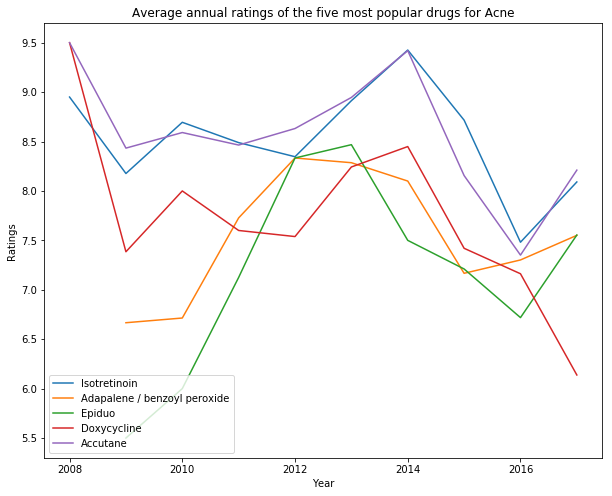

In [23]:
for condition in ConditionsDict:
    drugs = [cdf.at[0, 'drugName'] for cdf in ConditionsDict[condition]]
    fig = plt.figure(figsize=(10, 8))
    cdf = ConditionsDictYearly[condition]
    for i in range(len(drugs)):
        plt.plot(cdf[i]['year'], cdf[i]['rating'], label=drugs[i])
    plt.xlabel('Year')
    plt.ylabel('Ratings')
    plt.legend(loc='lower left')
    plt.title('Average annual ratings of the five most popular drugs for ' + condition)

In [24]:
text=nw.review
len(text)

53471

In [25]:
train.shape

(160398, 8)

In [26]:
import nltk.data
from nltk import word_tokenize,RegexpTokenizer
nltk.download('punkt')
nltk.tokenize.punkt
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\win-10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
new=[]
for i in range(len(text)):
    word=word_tokenize(text[i])
    new.append(word)
new    

KeyError: 34